# 此脚本用于讨论研究分类树在合成数集上的表现

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.tree import DecisionTreeClassifier
%matplotlib notebook

### 1.生成三种数据集

In [13]:
#make_classification库生成随机的二分型数据
X, y= make_classification(n_samples=100 #100样本数
                         ,n_features=2  #特征数2
                         ,n_redundant=0 #无冗余数据
                         ,n_informative=2 #包含特征信息2个
                         ,random_state=1 #随意模式1
                         ,n_clusters_per_class=1
                         ) #每个簇内包含的标签类别只有1个

<IPython.core.display.Javascript object>


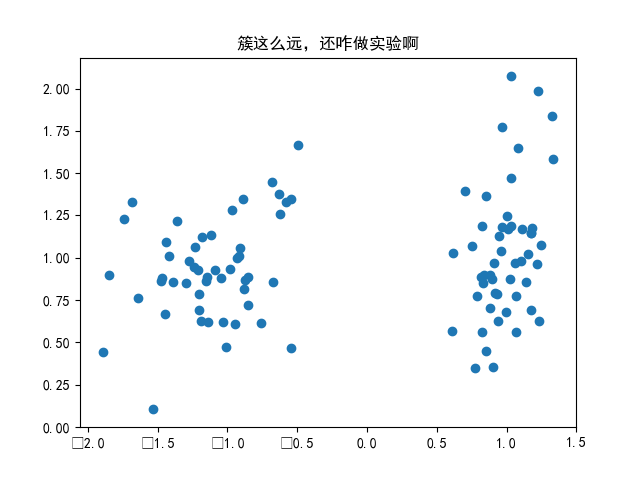

In [14]:
from pylab import *
rcParams['font.sans-serif'] = ['Simhei']
plt.scatter(X[:,0],X[:,1])
plt.title('簇这么远，还咋做实验啊')
plt.show()

In [15]:
rng = np.random.RandomState(2)
X += 2*rng.uniform(size=X.shape)
linearly_separable= (X,y)

In [16]:
#用make_moons创建月亮型数据
moons_data = make_moons(noise=0.3,random_state=0)

In [18]:
#make_circles创建环形数据
circles_data = make_circles(noise=0.5,factor=0.5,random_state=1)

In [22]:
datasets=[moons_data,circles_data,linearly_separable]

### 2.画出三种数据集和三棵决策树的分类效应图像

<IPython.core.display.Javascript object>


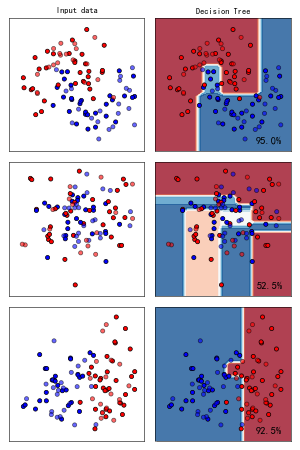

In [30]:
figure = plt.figure(figsize=(6, 9)) #创建画布，宽高比为6*9
i=1 #初始化子画布位置
for ds_index,ds in enumerate(datasets):#对于每一个数据，枚举类型转换为索引，值
    X,y = ds #获取X训练数据，y标签数据
    X = StandardScaler().fit_transform(X) #对X中的数据进行标准化处理
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=42)
    
    #准备数据分布的区间，然后绘制网格- - begin
    x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5 
    #函数meshgrid用以生成网格数据，能够将两个一维数组生成两个二维矩阵。
    array1,array2 = np.meshgrid(np.arange(x1_min,x1_max,0.2),np.arange(x2_min,x2_max,0.2))
    #生成的网格数据，是用来绘制决策边界的，因为绘制决策边界的函数contourf要求输入的两个特征都必须是二维的
    #准备数据分布的区间，然后绘制网格- - end
    
    
    ##接下来生成彩色画布
    #用ListedColormap为画布创建颜色，#FF0000正红，#0000FF正蓝
    cm = plt.cm.RdBu
    cm_bright= ListedColormap(['#FF0000', '#0000FF'])
    # 定义子图 数据为len(datasets)行，2列，放在位置i上
    ax = plt.subplot(len(datasets),2,i)
    #设定if ds_index==0这个条件给第一个图加个马甲
    if ds_index == 0:
        ax.set_title("Input data")
    #将数据集的分布放到我们的坐标系上
    ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright,edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test,cmap=cm_bright, alpha=0.6,edgecolors='k')
    #为图设置坐标轴的最大值和最小值，并设定没有坐标轴
    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1 #每次循环之后，改变i的取值让图每次位列不同的位置
    
    ####决策树模型####
    #创建子图
    ax = plt.subplot(len(datasets),2,i)
    #训练中。。。
    clf = DecisionTreeClassifier(max_depth=5)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    #训练完毕
    Z = clf.predict_proba(np.c_[array1.ravel(),array2.ravel()])[:, 1]
    Z = Z.reshape(array1.shape)
    #将返回的类概率作为数据，放到contourf里面绘制去绘制轮廓
    ax.contourf(array1, array2, Z, cmap=cm, alpha=.8)
    #为图设置坐标轴的最大值和最小值
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,edgecolors='k', alpha=0.6)   
    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
    #设定坐标轴不显示标尺也不显示数字
    ax.set_xticks(())
    ax.set_yticks(())
    if ds_index == 0:
        ax.set_title("Decision Tree")
    #写在右下角的数字
    ax.text(array1.max() - .3, array2.min() + .3, ('{:.1f}%'.format(score*100)),size=15, horizontalalignment='right')
    i += 1
plt.tight_layout()
plt.show()